# Computational Experiments -- Recombination vs Recurrence

## Goals
We aim to examine how the *incompatibility graph* produced by cross-over recombination differs from that produced by recurrent mutation. Ideally this experiment would help us develop and comunicate intuition for how the two models of sequence evolution difer, which would then allow us to distinguish the two types of events from one another with greater ease.

If appropriate, results from this experiment could be included in the paper togherer with or instead of the conceptual illustrations in figure 4.

## Potential experiments
Multiple different approaches seem possible:

1. Qualitative
    
  1. Use rejection sampling to simulate two datasets:
     * One with a single recombination evident in data.
     * One with a single recurrent mutation evindent in data.

  2. Fix two mutation rates $0 < \theta_{\text{low}} \ll \theta_{\text{high}}$ and a recombination-rate $\rho > 0$.
     Proceed to simulate two diferent datasets:       
     * One mutation rate $\theta_{\text{low}}$ and recombination rate $\rho$.
     * One mutation rate $\theta_{\text{high}}$ and recombination rate $0$.
       
    In either case, we would then for each dataset compute the incompatibility-graph and display the two side by side. THe experiment could be re-run to examine by naked eye the variation possible.

2. Quantitative
    
  1. Statistical properties of the incompatibility graph under either model: sample a large number of datasets under either model; for each dataset, compute the incompatability graph. Compute sample averages of graph-statistics for either model (e.g compare the degree-distribution in the graphs).
    * A simple statistic to distinguishing a star-shaped graph from a regular bipartite one might be $\max_{v \in V} \deg(v)$.
  2. Search for a good classifier: simulate a large set of incompatibility graphs for either model (like above). Attempt to construct a classifier that accurately predicts to which class new simulated incompatibility graphs belong.
    * Initially, seeing how various rules of thumb perform would be interesting.
    * Long term: we could examine classic classifiers fomr the mashine learning litterature, e.g. Support vecor machines or neural networks.

## Planned approach
I intend to start out with conducting experiment 1.A.
    
 * A good example would fit well into the article we are writing, and
 * Solving this problem is a stepping stone to solving more complex problems.
    
Afterwards, I would like to approach problem 2.A, and examine how informative $\max_{v \in V} \deg(v)$ is as a statistic for distinguishing the cause of incompatibilities. It might be usefull to contrast the results of experimets 1.A and 1.B.


## Project status

* I have already written code which is capable of simulating coalescents with recurrent ,mutations. Hence half of experiments 1.A and 1.B are as good as done.
* For simulating coalescents with mutation, I intend to use ms. i have written some scripts for running ms and piping the output to python. I still need to parse that output propperly, so that it can be analyzed and compare with the recurrence-output.
1. ~~I need to write a sampler for sequences experiencing recombination, or to find a package which allows me to do so.~~
  1. ~~My first task is to go through the litterature and see if I can find a library which supports simulating sequences in a 4 letter alphabet related by a coalescebt undergoing mutation.~~ I went with ms
  2. ~~If i can't find anything, I'll write a sampler myself.~~

2. I need to a small script which automates carrying out each of the experiments i intend to carry out.

3. I need to write code for displaying the results.
  1. ~~In particluar, I need to be able go generate good pictures of arbitrary incompatability graphs on the fly.~~
  
     1.~~Before re-inventing the wheel I should look at what good experiments exist out there.~~
       * I have decided to give [**networkx**](https://networkx.readthedocs.io) a spin. It seems to be able to do most of what i want with ease.
       * The results of this are in this notebook. I'm pleased with them so far.
  2. Given the number of discussions with my supervisors wherein I have been asked to show the coalsecent-tree associated with a given simulation, I should write code which allows me to plot a coalescent tree easily.
     1. The first step would be to write code for expressing the coalescent-objects i'm simulating (internally stored as timestambed sequences of partitions with mutations stored in a separate timestamped list in a class I develloped myself) in a datatype which a plotting-library can understand.
       1. My initial idea is to use networkx. This would requre me to express the coalsecent with mutations as a single graph. I'd have to translate two timestambed sequences of events into a set of edges and well-labelled nodes. This seems doable.

4. The tyope of "incompatibility" initially checked for has been changed.

    ~~Given two characters on $n$ sequences $c_1,c_2: [n] \rightarrow X$, we let the *direct product* of the two characters $<c_1,c_2> : [n] \rightarrow X$ be given by $i \mapsto (c_1(i), c_2(i))$. Our criterion for compatibility may then be expressed as follows:~~
    $$ \vert <c_1,c_2>([n]) \vert \leq \vert c_1([n]) \vert + \vert c_2([n]) \vert -1 $$
    ~~This criterion may be arrived at using the following informal line of reasoning: if a characer has $k$ states, we require $k-1$ mutations to explain that character. Hence the minimal number of mutation requred to explain $c_1$ and $c_2$ is $(\vert c_1([n]) \vert - 1)$ + $(\vert c_2([n]) \vert - 1)$. We refer to this quantity as $A$. If we regard $<c_1,c_2>$ as a character in its own right, (applying the same argument as before) we need at least $\vert <c_1,c_2>([n]) \vert -1$ mutations. Hence if $B>A$, we may conclude, that explaning $c_1$ and $c_2$ jointly, requres *extra* mutations (The exact form of the criterion given is $A +1 \leq B +1$ which is equivalent to $ B \not > A$). (note that $B < A$ may occur naturally, if we for instance observe the alleles $(0,0)$ and $(1,1)$, but neither $(0,1)$ nor $(1,0)$.)~~
  1. ~~I still need to formally proove that the condition I'm suing now it not just nessecary, but also sufficient. I have an informal inductive argument, but it'c clunky and wierd. I've deicided to write it down, and then to critically re-examine it in a weeks time.~~
  2. I constructed counterexamples to the above. The simplest is as follows:
     
     Let $(c_1(i))_{i=1\ldots5} = (0,0,1,1,2)$ and $(c_2(i))_{i=1\ldots5} = (0,1,0,1,2)$. Then both characters have 3 states, but the direct product has 5. Hence the above criterion fails to detect that $c_1$ and $c_2$ are incompatible (since the combined number of mutations nessecary to generate both on a tree is 5, which exceeds $(\vert c_1([n]) \vert - 1)$ + $(\vert c_2([n]) \vert - 1)$ = 4).


## Results from an old experiment I ran for Jotun

Jotun was interested in estimating what happened as the mutaion rate was cranked up a bit.

The main aim of the experiment was to output the plots at the bottom:
* the left hand one examining the distribution on the proportion of sites which exhibit 1, 2, 3, or 4 alleles as $\frac{\theta}{L}$ varies.
* the right hand plot examining how frequently the largest connected component in the incompatibility graph has size $s$ as $\frac{\theta}{L}$ varies.

A side effect which is of interest to us, is that I had it print the incompatibility graph any time the largest connected component contained at least 10 verticees.

Currently, I am re-tooling the old code from this experient to be used in our new experiments.

In [8]:
%matplotlib inline
import sys

In [9]:
## I import my simulator
simulations_dir = '/home/mathias/programming/coalescent-simulations'
sys.path.append(simulations_dir)
import finiteSitesModell_investigations as fsmi
import matplotlib.pyplot as plt

In [10]:
reload(fsmi) ## reloads in case the kernel is rerun.

<module 'finiteSitesModell_investigations' from '/home/mathias/programming/coalescent-simulations/finiteSitesModell_investigations.py'>

In [11]:
#fsmi.generate_plots_for_jotun(thetaMax=10,thetaMin=0.1,steps=3,N=10,savePath='')

## Playing around with networkx

Here I'm playing around with the basic commands for generating graphs and displaying them

In [12]:
import networkx as nx

In [13]:
# G = nx.Graph()
# G.add_nodes_from(range(20))
# G.add_edges_from([(i,10+i) for i in range(10)])

# nx.draw(G)

#nx.draw_spectral(G)

#nx.draw_shell(G)

#nx.draw_random(G)

#nx.draw_spring(G)

#G2 = nx.Graph()

#G2.add_edges_from([(1,i) for i in range(2,11)])

#print G2.edges()

#nx.draw_shell(G2)

#nx.draw_spring(G2)

#G2.add_edge(10,11)
#nx.draw_spring(G2,with_labels=True, node_color = 'w')

#[g for g in nx.components.connected.connected_component_subgraphs(G2)][0]

## A simple experiment

We sample a finite sites model with mutation rate $\frac{\theta}{2}$, compute the incompatibility graph and output its largest component. Note that there is no conditioning on the number of segregating sites or recurring mutations in this experiment.

When displaying the largest connected component of the incompatability graph, each labelled with the site it represents and coloured according to the number of mutations affecting that site. The colouring scheme used was the following:
    
>    indexed_palette = {

>                    0:'white',
>                    1:'pink',
>                    2:'turquoise',
>                    3:'lightgrey',
>                    4:'blue',
>                    5:'purple',
>                    6:'yellow',
>                    7:'darkgreen',
>                    8:'lime',
>                    9:'teal',
>                    10:'black',
>                    11:'green',
>                    12:'red',
>                    13:'orange'}

At the request of Jotun, I also print the incompatibility graph of the largest connected component.

In [14]:
from incompatability_graph_experiments import *

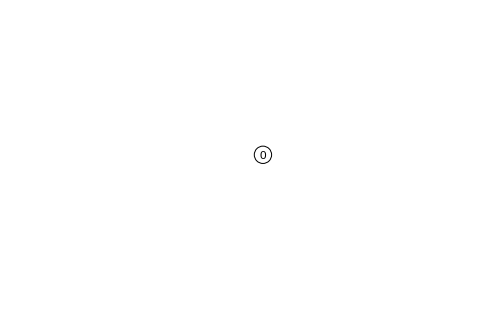

In [15]:
np.random.seed(1723000000)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 1000, theta = 25.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)
G_sim = results['graph']
sim = results['simulation']
plt.savefig('figures/incompatibility_graphs_jotuns_favourite_n15_L1000_t25.pdf',bbox_inches=0)
plt.savefig('figures/incompatibility_graphs_jotuns_favourite_n15_L1000_t25.png',bbox_inches=0)

In [16]:
# print sim.site_mutationCount
# nodes = list([c for c in results['components_as_sets'] if len(c) > 1][0])
# nodes.sort()
# print nodes
# determine_S_of_connected_components(results,with_header=True)

#### We demonstrate how the output of the graph can be used

In [17]:
#large_components = [g_sim for g_sim in results['components'] if len(g_sim.nodes()) > 1]
largest_connected_component = max(results['components'], key = lambda g: len(g.nodes()))
print largest_connected_component.degree()
largest_connected_component.edges()

{0: 0}


[]

We can also output the underlying coalescent tree (encoded as a coarsening sequence of time-stamped partitions):

In [18]:
print '\n'.join(str.split(str(sim.coal),'), ('))

[(0.0, 'P:[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]'
0.027327456018678913, 'P:[[0], [1, 8], [2], [3], [4], [5], [6], [7], [9], [10], [11], [12], [13], [14]]'
0.061771125131634706, 'P:[[0], [1, 8], [2], [3], [4], [5, 6], [7], [9], [10], [11], [12], [13], [14]]'
0.06638961127327887, 'P:[[0, 14], [1, 8], [2], [3], [4], [5, 6], [7], [9], [10], [11], [12], [13]]'
0.0702290696245197, 'P:[[0, 14], [1, 8], [2], [3, 10], [4], [5, 6], [7], [9], [11], [12], [13]]'
0.0900985312601, 'P:[[0, 14], [1, 8], [2], [3, 4, 10], [5, 6], [7], [9], [11], [12], [13]]'
0.09540638392584419, 'P:[[0, 14], [1, 3, 4, 8, 10], [2], [5, 6], [7], [9], [11], [12], [13]]'
0.12439020084478791, 'P:[[0, 14], [1, 3, 4, 8, 10], [2], [5, 6], [7], [9], [11, 13], [12]]'
0.2826573925952135, 'P:[[0, 14], [1, 3, 4, 8, 10], [2], [5, 6, 7], [9], [11, 13], [12]]'
0.3160875994963972, 'P:[[0, 1, 3, 4, 8, 10, 14], [2], [5, 6, 7], [9], [11, 13], [12]]'
0.3757813270028355, 'P:[[0, 1, 3, 4, 8, 10, 14], 

It whould be reasonably straight-forward to write a parser which takes the simulated coalescent and translates it into a data-structure which can be plotted with an existing tree-plotting library. I have however not done so at the moment, and it does not have top priority.

Since Jotun was particularily interested in the example above, I have worked out the coalescent tree by hand. It is rendered below (note that the time-axis is not uniform; instead each merger-event is labelled by the time at which it occurs).
![coalescent tree](tree_for_jotun_with_mutations--cropped.jpg)

We may repeat the entire experiment carried out above with a different seed, as below:

[[1 1 1 3]
 [0 0 0 3]
 [0 0 0 3]
 [0 0 3 3]
 [2 3 3 0]
 [0 0 3 3]
 [2 3 3 3]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 3]
 [0 0 0 3]
 [0 0 0 3]
 [0 0 0 3]
 [2 3 3 3]
 [0 0 0 0]
 [0 0 0 0]]


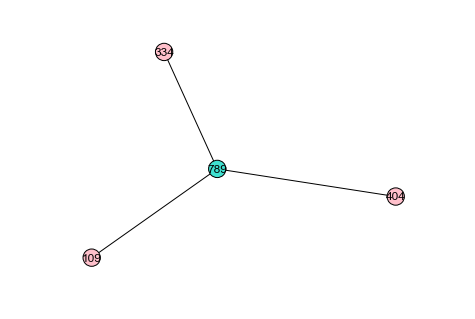

In [19]:
np.random.seed(172300001)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 1000, theta = 25.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

[[ 1  1  1 13  1  1  1  1  1  1  1  1  1  1]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 3  0  3  3  2  0  1  3  2  0  2  0  1  2]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 3  0  3  0  2  0  1  3  2  0  2  0  1  2]
 [ 3  0  3  3  2  0  1  3  2  0  2  0  1  2]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]]


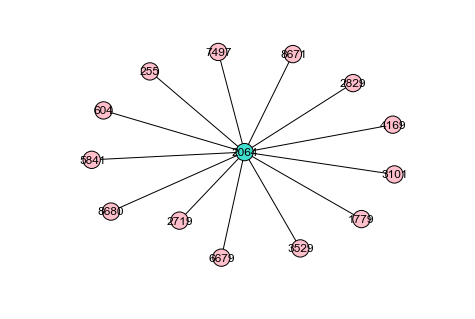

In [20]:
np.random.seed(172300006)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 10000, theta = 50.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

### When the site-wise mutation rate is high, the incompatibility graph stops being' star-shaped. Below, we see some examples of this

Below we see a single example

[[1 1 3 3 2]
 [1 0 1 3 0]
 [1 2 0 1 0]
 [2 3 0 3 2]
 [3 0 2 3 0]
 [2 3 2 1 2]]
[(0.0, 'P:[[0], [1], [2], [3], [4]]'
0.09478121199026035, 'P:[[0], [1], [2, 4], [3]]'
0.6948849372387138, 'P:[[0], [1, 2, 4], [3]]'
0.8246096266937557, 'P:[[0, 3], [1, 2, 4]]'
4.942676266703163, 'P:[[0, 1, 2, 3, 4]]')]
[(0, 6), (3, 4), (4, 8), (4, 6), (6, 8)]


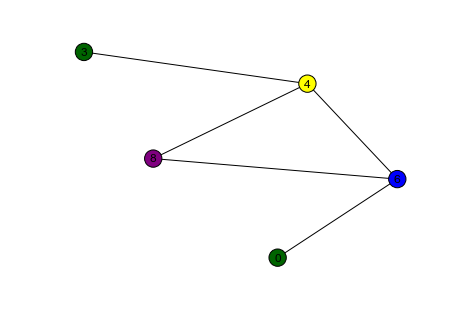

In [21]:
np.random.seed(172300001)
results = simulate_single_graph_and_output_incompatibility_graph(n =5, L = 10, theta = 10.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)
sim = results['simulation']
print '\n'.join(str.split(str(sim.coal),'), ('))
print results['graph'].edges()

If we for the moment ignore the S-matricees, we can generate a larger array of incompatibility matricees to see the diversity at different mutation rates.

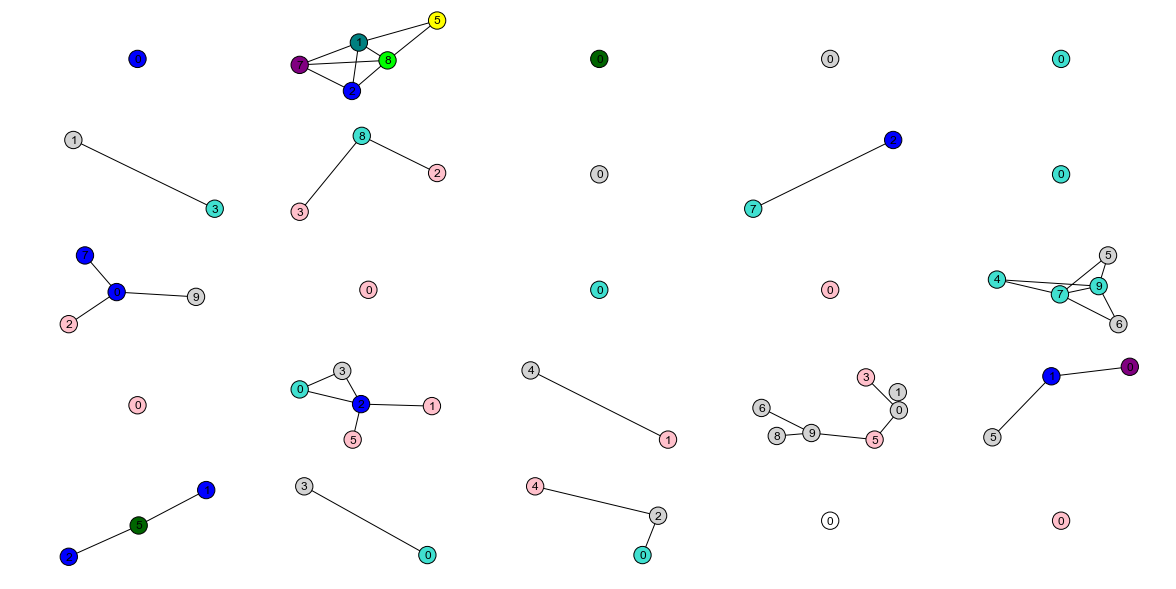

In [22]:
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =5, L = 10, theta = 10.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n5_L10_t10.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n5_L10_t10.png',bbox_inches=0)

We now preceed to make pictures like above, but with different parameter valies. I will start examinig what happens as the site-wise mutation rate is increased for 3 sequences observed at 10 sites:

## Setting: $n=3, L = 10, \theta = 1$

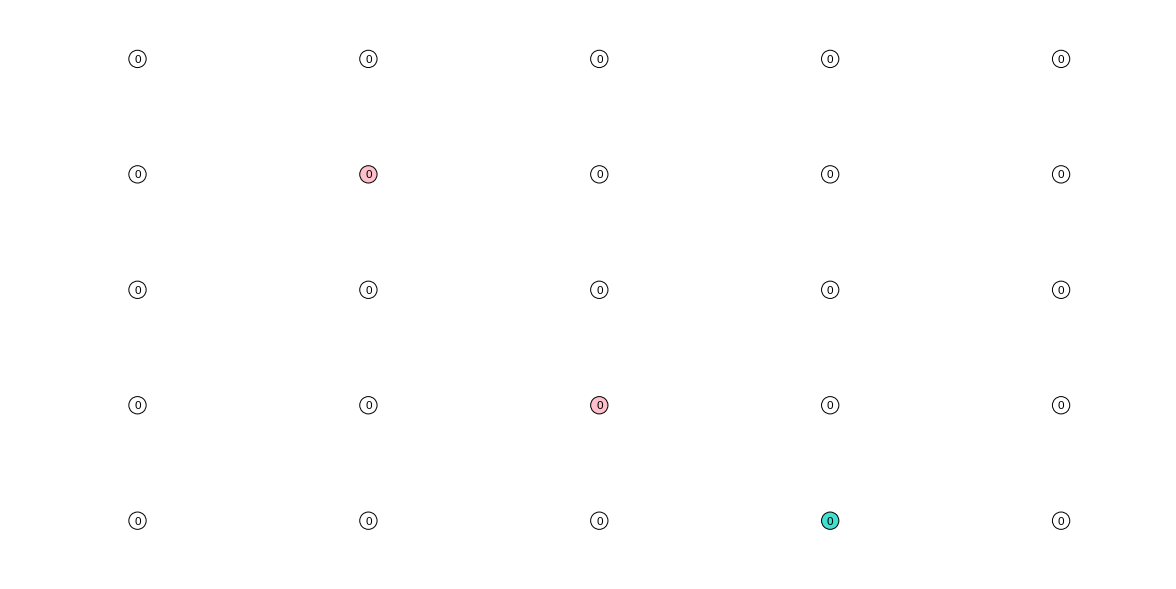

In [23]:
np.random.seed(1723)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3, L = 10, theta = 1.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t1.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t1.png',bbox_inches=0)

We see that little is going on here (as expected).

## Setting: $n=3, L = 10, \theta = 5$
(same as before but the site wise mutation rate $\frac \theta {2 L}$ is increased to 0.25 (a tenfold increase)

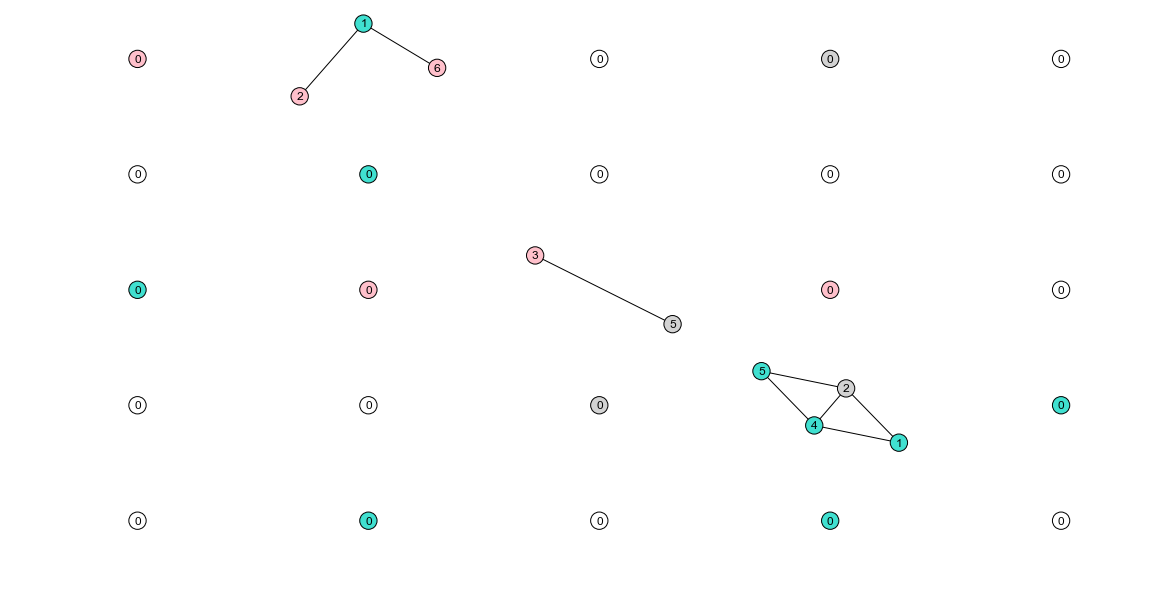

In [24]:
np.random.seed(2317)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3 , L = 10, theta = 5.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t5.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t5.png',bbox_inches=0)

We see here that this leads to an increased pressence of incompatibilities, and that the structure fo the incompatibility graph is less predictable: the number of mutations affecting the incompatible loci (given by the colour of each locus) is no longer minimal in many instances, and the graph is not always star-shaped.

### We now carry out the above experiments with the same values of $n$ and $\frac{\theta}{2L}$, but $L = 100$

## Setting: $n=3, L = 100, \theta = 10$

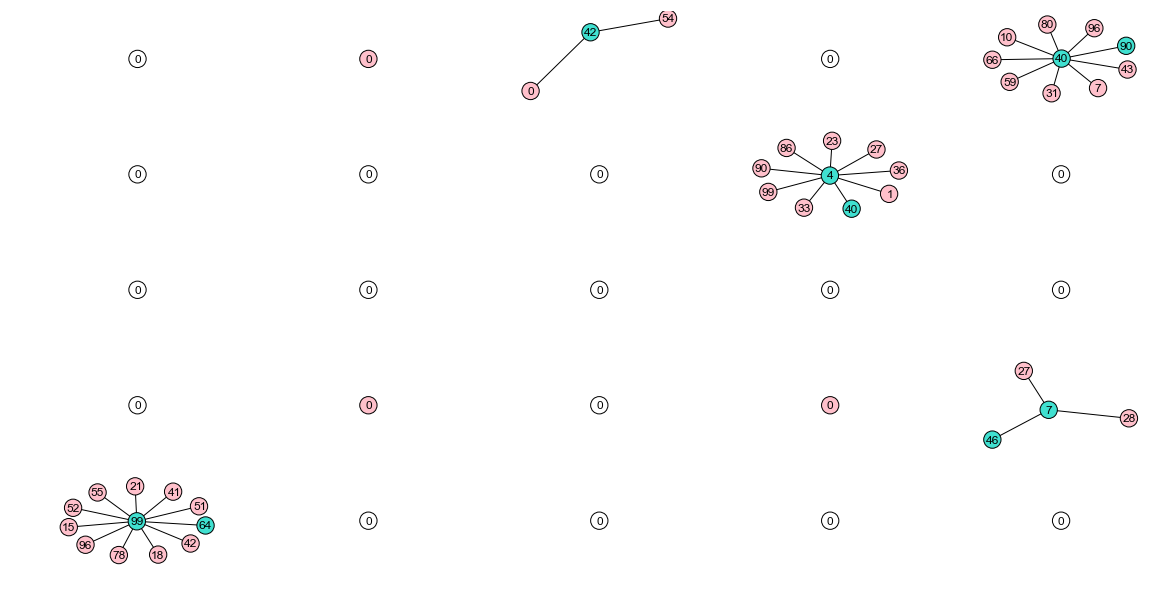

In [25]:
np.random.seed(1723)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3, L = 100, theta = 10.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t10.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t10.png',bbox_inches=0)

We see that more is going on here than before. A possible explanation thereof is as follows: although each individual column will be subject to the same number of mutations, there is a higher probability that at least *some* columns will be incompatilbe (the there are more of them).

## Setting: $n=3, L = 100, \theta = 50$
(same as before but the site wise mutation rate $\frac \theta {2 L}$ is increased to 0.25 (a tenfold increase)

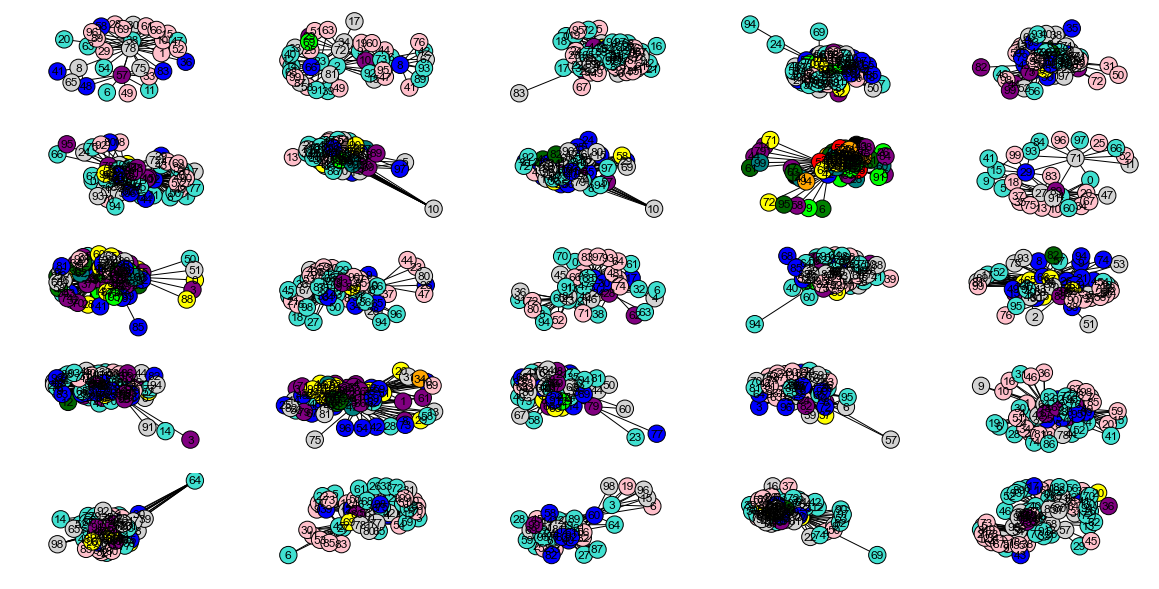

In [28]:
np.random.seed(2317)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
results = []
for i in range(graphs):
    plt.subplot(rows,cols,i)
    #print i
    results.append(simulate_single_graph_and_output_incompatibility_graph(n =10 , L = 100, theta = 100.0, draw_largest_connected_component = True))
    #print 
    determine_S_of_connected_components(results[-1],print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t50.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t50.png',bbox_inches=0)

As before: increasing $\theta$ will lead to a more diverse class of larger incompatibility graphs. An interesting observation here is however that the graphs still seem highly centralized.

An interesting observation is it seems that there often seem to be a few hub-nodes affected by a higher number of mutaions, and that edge-nodes tend to be incompatible with almost all of them.

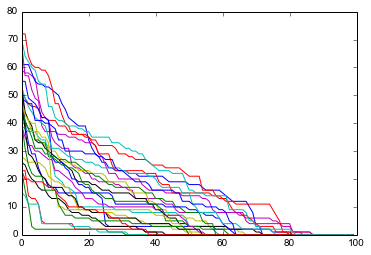

In [36]:
for res in results:
    degrees = res['graph'].degree().values()
    degrees.sort(reverse = True)
    deg_arr = np.array(degrees,dtype = float)
    plt.plot(deg_arr)

We  can re-normalize the above plot, if we are more interested the decay of degrees 

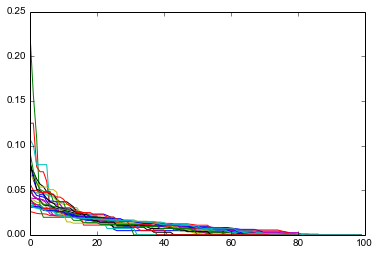

In [35]:
for res in results:
    degrees = res['graph'].degree().values()
    degrees.sort(reverse = True)
    deg_arr = np.array(degrees,dtype = float)
    plt.plot(deg_arr/sum(degrees))

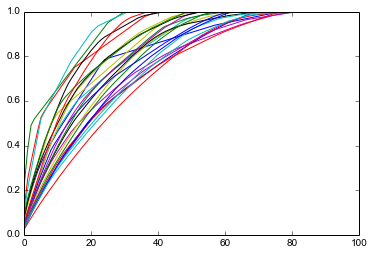

In [37]:
for res in results:
    degrees = res['graph'].degree().values()
    degrees.sort(reverse = True)
    deg_arr = np.array(degrees,dtype = float)
    plt.plot([sum(deg_arr[:i+1])/sum(degrees) for i in xrange(len(degrees))])